# Classification du vin




In [ ]:
import pandas as pd
import chardet

with open('winequality-red.csv', 'rb') as f:
    result = chardet.detect(f.read())

images = pd.read_csv('winequality-red.csv', delimiter=";",decimal = ".",encoding=result['encoding'])
images.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
from sklearn.model_selection import train_test_split

X = images.drop(['quality'], axis=1).copy()
Y = images['quality'].copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=12345)
X_train.shape
X_test.shape
print(X_train.shape,X_test.shape)

(1199, 11) (400, 11)


2. (Regularized) Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score


clf_LR = LogisticRegression(penalty="none", multi_class="multinomial", solver="saga", tol=0.01)
clf_LR.fit(X_train, Y_train)


accuracy_LR = accuracy_score(Y_test, clf_LR.predict(X_test))

print("Accuracy of Logistic Regression :","%.3f" % accuracy_LR)

clf_l1_LR = LogisticRegressionCV(penalty='l1', cv=10, multi_class="multinomial",
                                 solver="saga",tol=0.01, random_state=12345)
clf_l1_LR.fit(X_train, Y_train)

accuracy_l1_LR = accuracy_score(Y_test, clf_l1_LR.predict(X_test))

print("Accuracy of Logistic Regression with Lasso penalty :","%.3f" % accuracy_l1_LR)

clf_l2_LR = LogisticRegressionCV(penalty='l2', cv=10, multi_class="multinomial",
                                 solver="saga",tol=0.01, random_state=12345)
clf_l2_LR.fit(X_train, Y_train)

accuracy_l2_LR = accuracy_score(Y_test, clf_l2_LR.predict(X_test))

print("Accuracy of Logistic Regression with Ridge penalty :","%.3f" % accuracy_l2_LR)

clf_l1l2_LR = LogisticRegressionCV(penalty='elasticnet', l1_ratios=[0.1,0.2,0.5,0.7,0.9],
                                   cv=10, multi_class="multinomial",
                                 solver="saga",tol=0.01, random_state=12345)
clf_l1l2_LR.fit(X_train, Y_train)

accuracy_l1l2_LR = accuracy_score(Y_test, clf_l1l2_LR.predict(X_test))

print("Accuracy of Logistic Regression with Elastic-net penalty :","%.3f" % accuracy_l1l2_LR)



Accuracy of Logistic Regression : 0.512


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


Accuracy of Logistic Regression with Lasso penalty : 0.512


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


Accuracy of Logistic Regression with Ridge penalty : 0.510


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


Accuracy of Logistic Regression with Elastic-net penalty : 0.507


3. SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_sd = StandardScaler()

# Get scaling parameters with the train sample exclusively, using the Scaler.fit() function
scaler_sd.fit(X_train)

# Scale data using Scaler.transform()
X_train_scaled = pd.DataFrame(scaler_sd.transform(X_train))
X_test_scaled = pd.DataFrame(scaler_sd.transform(X_test))

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'C': [1, 10, 100,1000, 2000],
   'gamma': [0.0001, 0.001,0.0050],
   'kernel': ['rbf']},
 ]

optimal_params = GridSearchCV(
        SVC(),
        param_grid,
        cv=10,
        verbose=0
    )

optimal_params.fit(X_train_scaled, Y_train)
print(optimal_params.best_params_)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


{'C': 1000, 'gamma': 0.005, 'kernel': 'rbf'}


In [ ]:
clf_svm = SVC(random_state=12345, C=1000, gamma=0.005, probability=True)
clf_svm.fit(X_train_scaled, Y_train)

accuracy_svm = accuracy_score(Y_test, clf_svm.predict(X_test_scaled))

print("Accuracy of Support Vector Machines :","%.3f" % accuracy_svm)

Accuracy of Support Vector Machines : 0.583


4. Random Forests

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=12345)
param_grid = {'n_estimators' : [ 100, 200],
            'max_features' : [2,3,4,5]  }

optimal_params = GridSearchCV(
        RF,
        param_grid,
        cv=10,
        verbose=0
    )

optimal_params.fit(X_train, Y_train)
print(optimal_params.best_params_)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


{'max_features': 3, 'n_estimators': 100}


In [ ]:

clf_RF = RandomForestClassifier(n_estimators=100, max_features=3,random_state=12345)

clf_RF.fit(X_train, Y_train)

accuracy_RF = accuracy_score(Y_test, clf_RF.predict(X_test))

print("Accuracy of Random Forests :","%.3f" % accuracy_RF)

Accuracy of Random Forests : 0.695


5. XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier


label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y_train = label_encoder.transform(Y_train)

param_grid = {'max_depth':[2, 3, 5], 'gamma':[0, 0.5, 1], 'n_estimators':[100, 200], 'learning_rate':[0.01, 0.05, 0.1]}

optimal_params = GridSearchCV(
        XGBClassifier(objective='multi:softprob', seed='12345'),
        param_grid,
        cv=10,
        verbose=0
    )

optimal_params.fit(X_train,label_encoded_y_train)
print(optimal_params.best_params_)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


{'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}


In [ ]:
clf_xgb = XGBClassifier(objective='multi:softprob', seed='12345',
                       gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200)
clf_xgb.fit(X_train, label_encoded_y_train)

accuracy_xgb = accuracy_score(label_encoder.transform(Y_test), clf_xgb.predict(X_test))

print("Accuracy of XGBOOST :","%.3f" % accuracy_xgb)

Accuracy of XGBOOST : 0.700


4. Stacking

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [
    ('lr', clf_LR),
    ('rf', clf_RF),
    ('svm',make_pipeline(StandardScaler(),clf_svm))]

clf_stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),
                              stack_method='predict_proba')

clf_stack.fit(X_train,Y_train)

StackingClassifier(estimators=[('lr',
                                LogisticRegression(multi_class='multinomial',
                                                   penalty='none',
                                                   solver='saga', tol=0.01)),
                               ('rf',
                                RandomForestClassifier(max_features=3,
                                                       random_state=12345)),
                               ('svm',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc',
                                                 SVC(C=1000, gamma=0.005,
                                                     probability=True,
                                                     random_state=12345))]))],
                   final_estimator=LogisticRegression(),
                   stack_method='predict_proba')

In [ ]:
accuracy_stack = accuracy_score(Y_test, clf_stack.predict(X_test))

print("Accuracy of Stacking :","%.3f" % accuracy_stack)

Accuracy of Stacking : 0.693


5. Comparaison des performances

In [ ]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

Y_classes = np.unique(Y)
Y_test_binarized = label_binarize(Y_test, classes=Y_classes)
n_classes = len(Y_classes)


# Logistic Regression
score_lr = clf_LR.predict_proba(X_test)
fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()
for i in range(n_classes):
    fpr_lr[i], tpr_lr[i], _ = roc_curve(Y_test_binarized[:,i], score_lr[:, i])
    roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])
# SVM
score_svm = clf_svm.predict_proba(X_test_scaled)
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
for i in range(n_classes):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(Y_test_binarized[:,i], score_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])
# Random Forests
score_rf = clf_RF.predict_proba(X_test)
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(Y_test_binarized[:,i], score_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])
# XGBOOST
score_xgb = clf_xgb.predict_proba(X_test)
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(Y_test_binarized[:,i], score_xgb[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])
# Stacking
score_stack = clf_stack.predict_proba(X_test)
fpr_stack = dict()
tpr_stack = dict()
roc_auc_stack = dict()
for i in range(n_classes):
    fpr_stack[i], tpr_stack[i], _ = roc_curve(Y_test_binarized[:,i], score_stack[:, i])
    roc_auc_stack[i] = auc(fpr_stack[i], tpr_stack[i])


# Compute micro-average ROC curve and ROC area
# Logistic Regression
fpr_lr["micro"], tpr_lr["micro"], _ = roc_curve(Y_test_binarized.ravel(), score_lr.ravel())
roc_auc_lr["micro"] = auc(fpr_lr["micro"], tpr_lr["micro"])
# SVM
fpr_svm["micro"], tpr_svm["micro"], _ = roc_curve(Y_test_binarized.ravel(), score_svm.ravel())
roc_auc_svm["micro"] = auc(fpr_svm["micro"], tpr_svm["micro"])
# Random Forests
fpr_rf["micro"], tpr_rf["micro"], _ = roc_curve(Y_test_binarized.ravel(), score_rf.ravel())
roc_auc_rf["micro"] = auc(fpr_rf["micro"], tpr_rf["micro"])
# XGBOOST
fpr_xgb["micro"], tpr_xgb["micro"], _ = roc_curve(Y_test_binarized.ravel(), score_xgb.ravel())
roc_auc_xgb["micro"] = auc(fpr_xgb["micro"], tpr_xgb["micro"])
# Stacking
fpr_stack["micro"], tpr_stack["micro"], _ = roc_curve(Y_test_binarized.ravel(), score_stack.ravel())
roc_auc_stack["micro"] = auc(fpr_stack["micro"], tpr_stack["micro"])

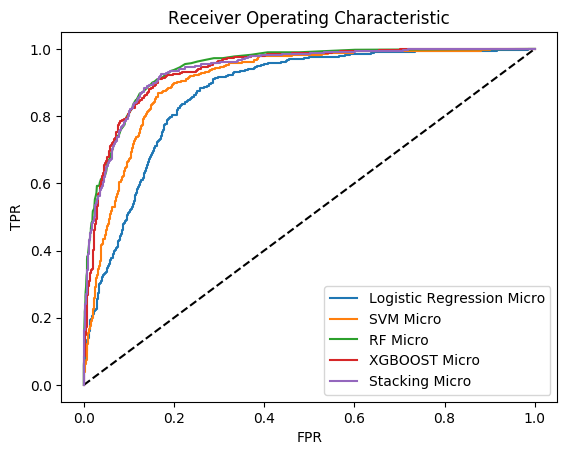

Area under Roc Curve (micro-average) for:
 - Logistic Regression:  0.871 
 - SVM:  0.906 
 - Random Forests:  0.906 
 - XGBOOST:  0.936 
 - Stacking:  0.938 

Area under Roc Curve (one-vs-one macro-average) for:
 - Logistic Regression:  0.592 
 - SVM:  0.776 
 - Random Forests:  0.858 
 - XGBOOST:  0.813 
 - Stacking:  0.836 



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr_lr["micro"], tpr_lr["micro"], label= "Logistic Regression Micro")
plt.plot(fpr_svm["micro"], tpr_svm["micro"], label= "SVM Micro")
plt.plot(fpr_rf["micro"], tpr_rf["micro"], label= "RF Micro")
plt.plot(fpr_xgb["micro"], tpr_xgb["micro"], label= "XGBOOST Micro")
plt.plot(fpr_stack["micro"], tpr_stack["micro"], label= "Stacking Micro")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()


print("Area under Roc Curve (micro-average) for:\n",
     "- Logistic Regression: ", "%.3f" % roc_auc_lr["micro"],"\n",
     "- SVM: ", "%.3f" % roc_auc_svm["micro"],"\n",
     "- Random Forests: ", "%.3f" % roc_auc_svm["micro"],"\n",
     "- XGBOOST: ", "%.3f" % roc_auc_xgb["micro"],"\n",
     "- Stacking: ", "%.3f" % roc_auc_stack["micro"],"\n",
     )

# Compare with AUC one-vs-one and macro-averaging
print("Area under Roc Curve (one-vs-one macro-average) for:\n",
     "- Logistic Regression: ", "%.3f" % roc_auc_score(Y_test, score_lr, multi_class="ovo", average="macro"),"\n",
     "- SVM: ", "%.3f" % roc_auc_score(Y_test, score_svm, multi_class="ovo", average="macro"),"\n",
     "- Random Forests: ", "%.3f" % roc_auc_score(Y_test, score_rf, multi_class="ovo", average="macro"),"\n",
     "- XGBOOST: ", "%.3f" % roc_auc_score(label_encoder.transform(Y_test), score_xgb, multi_class="ovo", average="macro"),"\n",
     "- Stacking: ", "%.3f" % roc_auc_score(Y_test, score_stack, multi_class="ovo", average="macro"),"\n",
     )